In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


YOLO V5

In [ ]:
%cd /content

/content


In [1]:
import yaml
import torch
from IPython.display import Image, clear_output
!git clone https://github.com/ultralytics/yolov5
% cd yolov5
%pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 12180, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 12180 (delta 1), reused 1 (delta 0), pack-reused 12173
Receiving objects: 100% (12180/12180), 11.96 MiB | 25.68 MiB/s, done.
Resolving deltas: 100% (8429/8429), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 


In [ ]:
!pwd

In [3]:
# %mkdir /content/yolov5/pothole
%cd /content/yolov5

/content/yolov5


In [ ]:
!pip install roboflow

     |████████████████████████████████| 145 kB 4.2 MB/s 
     |████████████████████████████████| 178 kB 33.3 MB/s 
     |████████████████████████████████| 1.1 MB 84.1 MB/s 
     |████████████████████████████████| 67 kB 7.7 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 138 kB 93.9 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.4-py3-none-any.whl size=21356 sha256=f6893bbfe5a097ff3bfad04b0bfaabb6385207b3195461403aca90ec3de2a76b
  Stored in directory: /root/.cache/pip/wheels/b7/2c/60/3733c0e323b1d7aec00f852264314bf6c48192c8e1dc92b3ee
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=5465301b35d848f3bdd94d16ec6ce4c48b3a49e4b44666983d50df6389d1e8d0
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built roboflow wget
  Attempting uninstall: urllib3
    Found existing instal

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YnfvRHjDGCRov5uKfCW3")
project = rf.workspace("strawberry-disease").project("strawberry-disease-detection-dataset")
dataset = project.version(4).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Strawberry-Disease-Detection-Dataset-4 in yolov5pytorch:: 100%|██████████| 9808/9808 [00:01<00:00, 9513.79it/s]


In [ ]:
!ls

CONTRIBUTING.md  LICENSE	   Strawberry-Disease-Detection-Dataset-2
data		 models		   train.py
detect.py	 README.md	   tutorial.ipynb
export.py	 requirements.txt  utils
hubconf.py	 setup.cfg	   val.py


학습

In [ ]:
from glob import glob

train_img_ilst = glob('/content/yolov5/Strawberry-Disease-Detection-Dataset-2/train/images/*.jpg')
test_img_ilst = glob('/content/yolov5/Strawberry-Disease-Detection-Dataset-2/test/images/*.jpg')
valid_img_ilst = glob('/content/yolov5/Strawberry-Disease-Detection-Dataset-2/valid/images/*.jpg')
print(len(train_img_ilst))
print(len(test_img_ilst))
print(len(valid_img_ilst))

3426
484
988


YAML은 구성 파일 작성에 자주 사용되는 데이터 직렬화 언어

In [ ]:
import yaml

with open('/content/yolov5/Strawberry-Disease-Detection-Dataset-2/train.text', 'w') as f:
  f.write('\n'.join(train_img_ilst)+'\n')
with open('/content/yolov5/Strawberry-Disease-Detection-Dataset-2/test.text', 'w') as f:
  f.write('\n'.join(test_img_ilst)+'\n')
with open('/content/yolov5/Strawberry-Disease-Detection-Dataset-2/valid.text', 'w') as f:
  f.write('\n'.join(valid_img_ilst)+'\n')

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
# cat 두 개 이상의 파일을 연결(concatenate)해서 출력

%cat /content/yolov5/Strawberry-Disease-Detection-Dataset-2/data.yaml

names: [Angular Leafspot, Anthracnose Fruit Rot, Blossom Blight, Gray Mold, Leaf Spot,
  Powdery Mildew Fruit, Powdery Mildew Leaf]
nc: 7
train: Strawberry-Disease-Detection-Dataset-4/train/images
val: Strawberry-Disease-Detection-Dataset-4/valid/images


In [ ]:
%%writetemplate /content/yolov5/Strawberry-Disease-Detection-Dataset-2/data.yaml
train: ./Strawberry-Disease-Detection-Dataset-2/train/images
test : ./Strawberry-Disease-Detection-Dataset-2/test/images
val: ./Strawberry-Disease-Detection-Dataset-2/valid/images

nc: 7
names: ['Angular Leafspot', 'Anthracnose Fruit Rot', 'Blossom Blight', 'Gray Mold', 'Leaf Spot', 'Powdery Mildew Fruit', 'Powdery Mildew Leaf']

In [ ]:
%cat /content/yolov5/Strawberry-Disease-Detection-Dataset-2/data.yaml

train: ./Strawberry-Disease-Detection-Dataset-2/train/images
test : ./Strawberry-Disease-Detection-Dataset-2/test/images
val: ./Strawberry-Disease-Detection-Dataset-2/valid/images

nc: 7
names: ['Angular Leafspot', 'Anthracnose Fruit Rot', 'Blossom Blight', 'Gray Mold', 'Leaf Spot', 'Powdery Mildew Fruit', 'Powdery Mildew Leaf']

In [ ]:
# 모델 구성

with open('/content/yolov5/Strawberry-Disease-Detection-Dataset-2/data.yaml', 'r') as stream: # stream 입출력
  num_classes = str(yaml.safe_load(stream)['nc'])

num_classes

'7'

In [ ]:
%cat /content/yolov5/models/yolov5l.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5l.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 7  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

학습(Training)
- img : 입력 이미지 크기 정의
- batch : 배치 크기 결정
- epochs : 학습 기간 개수 정의
- data : yaml 파일 경로
- cfg : 모델 구성 지정
- weights : 가중치에 대한 경로 지정
- name : 결과 이름
- nosave : 최종 체크포인트만 저장
- cache : 빠른 학습을 위한 이미지 캐시


In [ ]:
# python train.py --data coco.yaml --cfg yolov5s.yaml --weights '' --batch-size 64
#                                        yolov5m                   --batch-size 40                           
#                                        yolov5l                   --batch-size 24
#                                        yolov5x                   --batch-size 16

In [ ]:
%time
%cd /content/yolov5
!python train.py --img 640 --batch 64 --epochs 500 --data ./Strawberry-Disease-Detection-Dataset-2/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name pothole_results --cache

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.53 µs
/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./Strawberry-Disease-Detection-Dataset-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=pothole_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-207-g5774a15 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentu

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!ls /content/yolov5/runs/train/pothole_results/

confusion_matrix.png				   results.png
events.out.tfevents.1652750499.c042dd8d7306.299.0  train_batch0.jpg
F1_curve.png					   train_batch1.jpg
hyp.yaml					   train_batch2.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
opt.yaml					   val_batch1_labels.jpg
P_curve.png					   val_batch1_pred.jpg
PR_curve.png					   val_batch2_labels.jpg
R_curve.png					   val_batch2_pred.jpg
results.csv					   weights


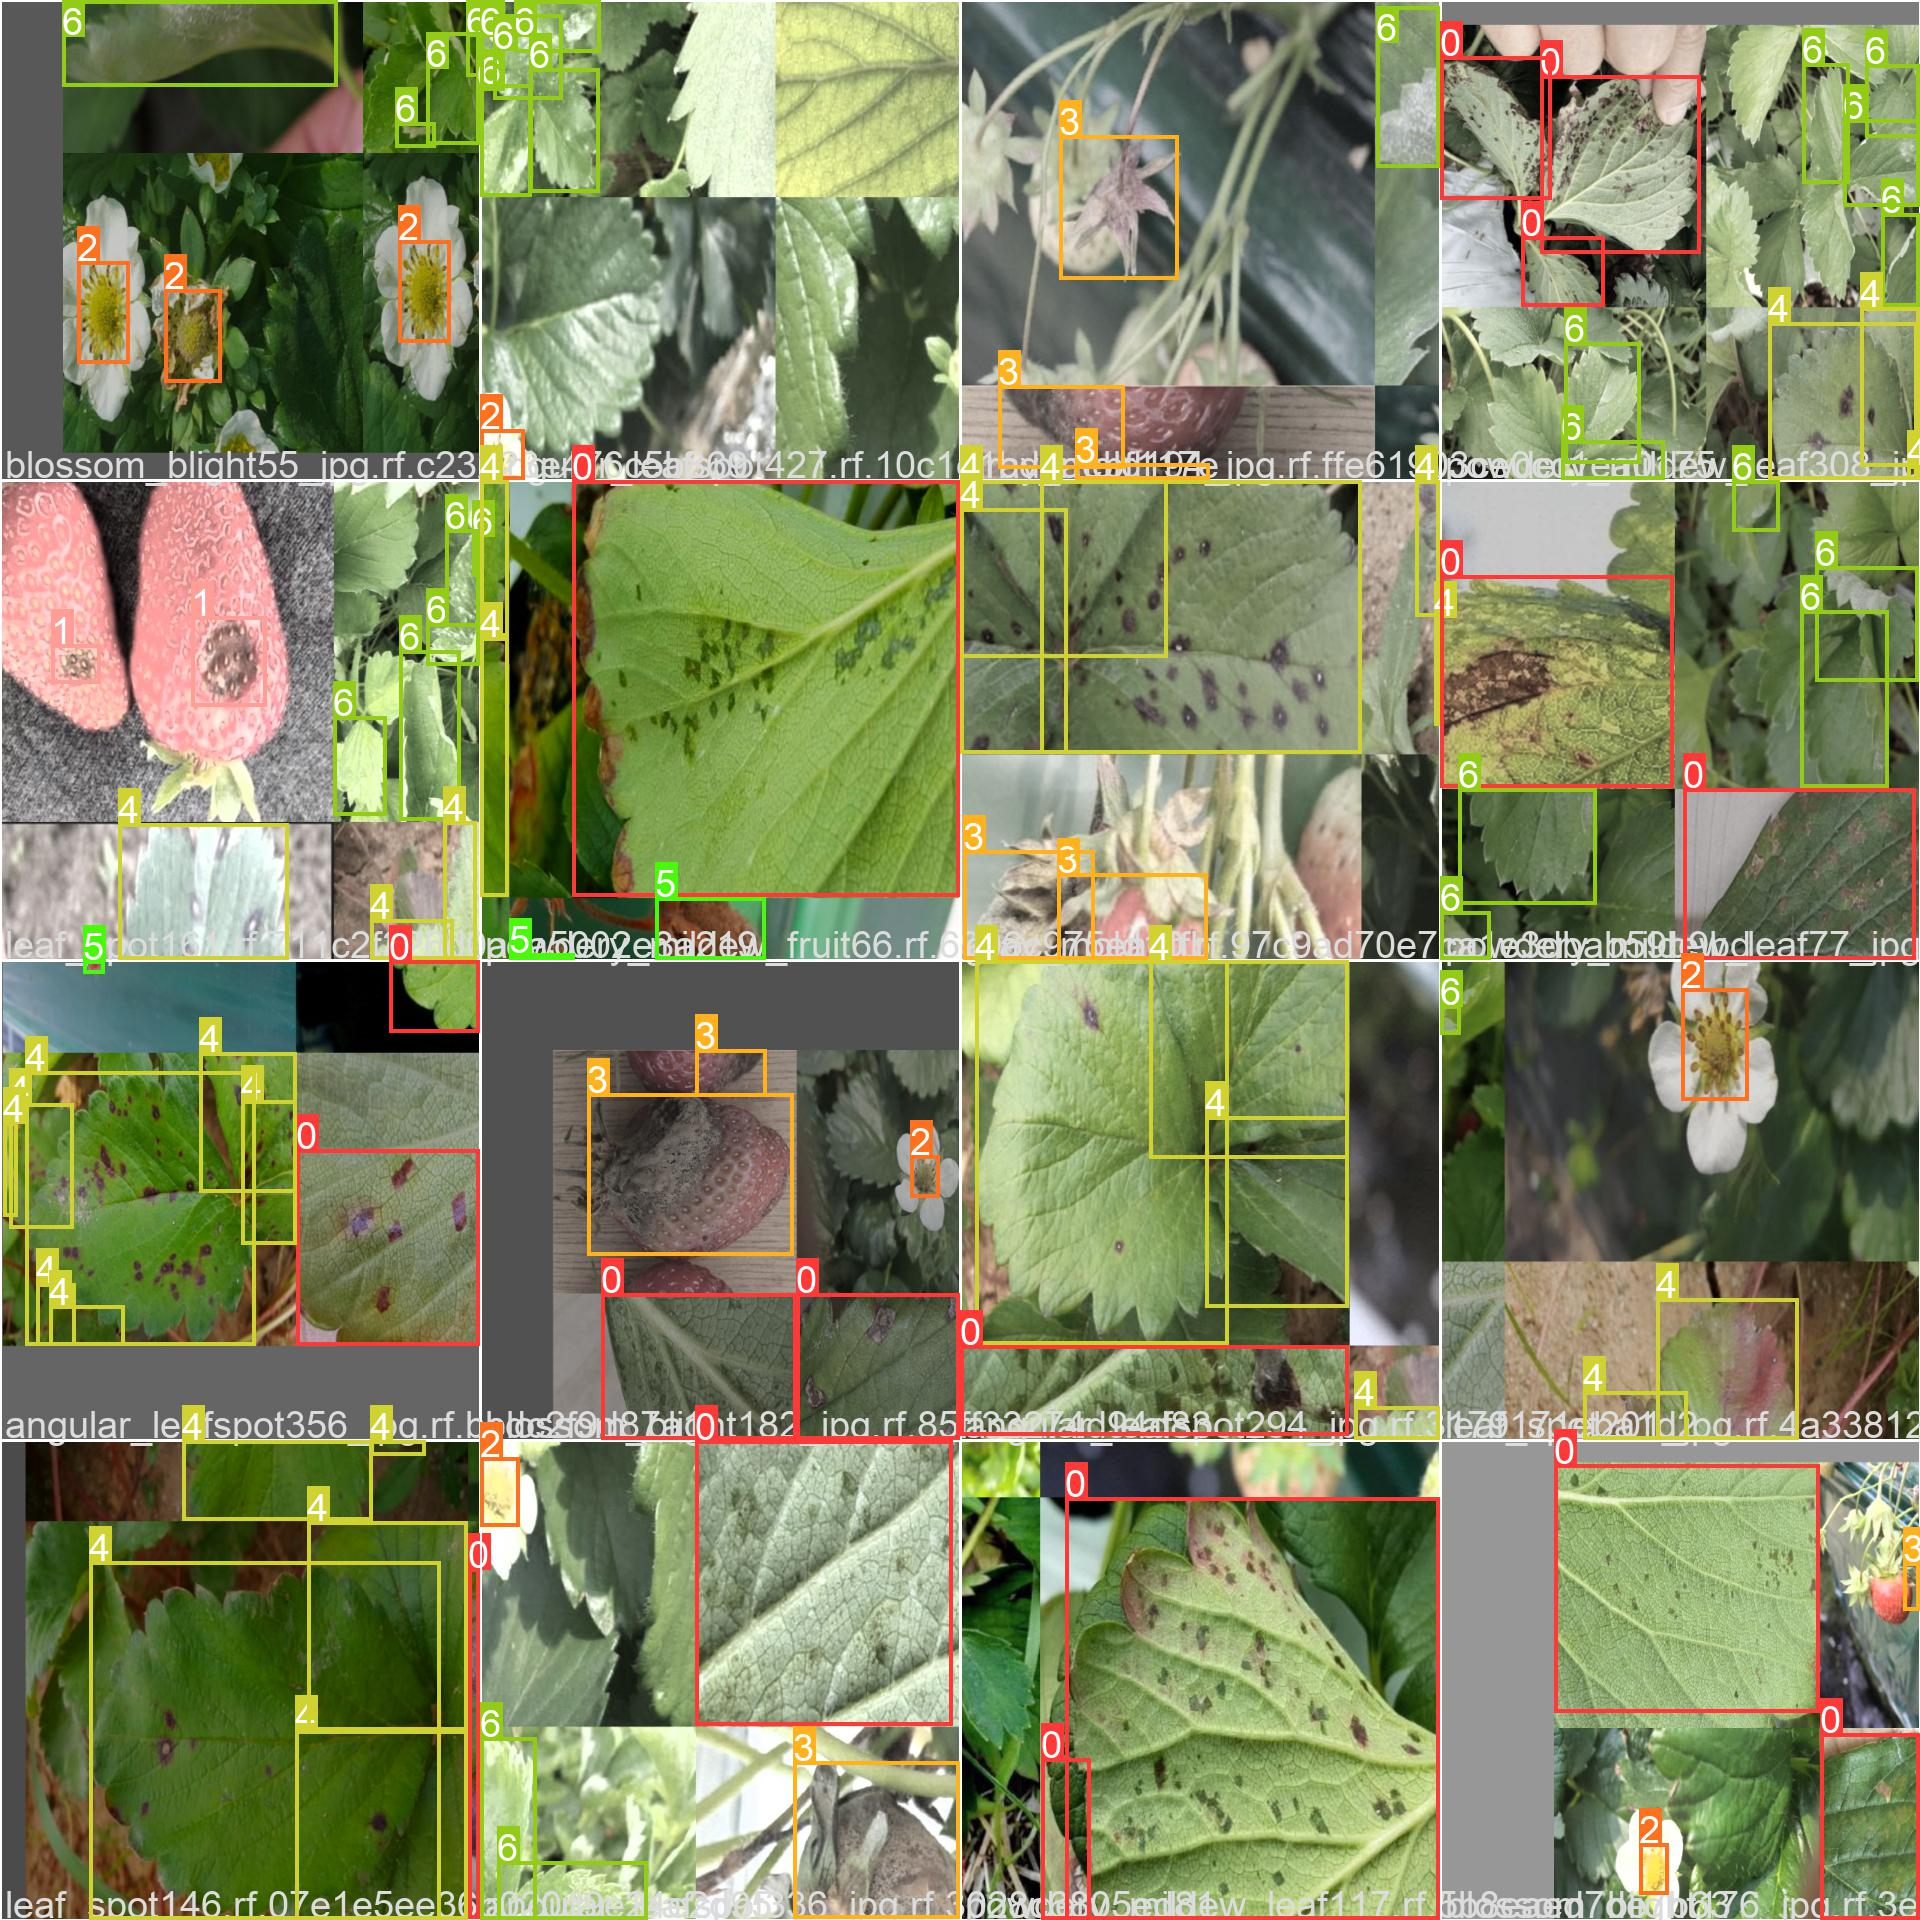

In [ ]:
Image(filename='/content/yolov5/runs/train/pothole_results/train_batch0.jpg', width=1000)

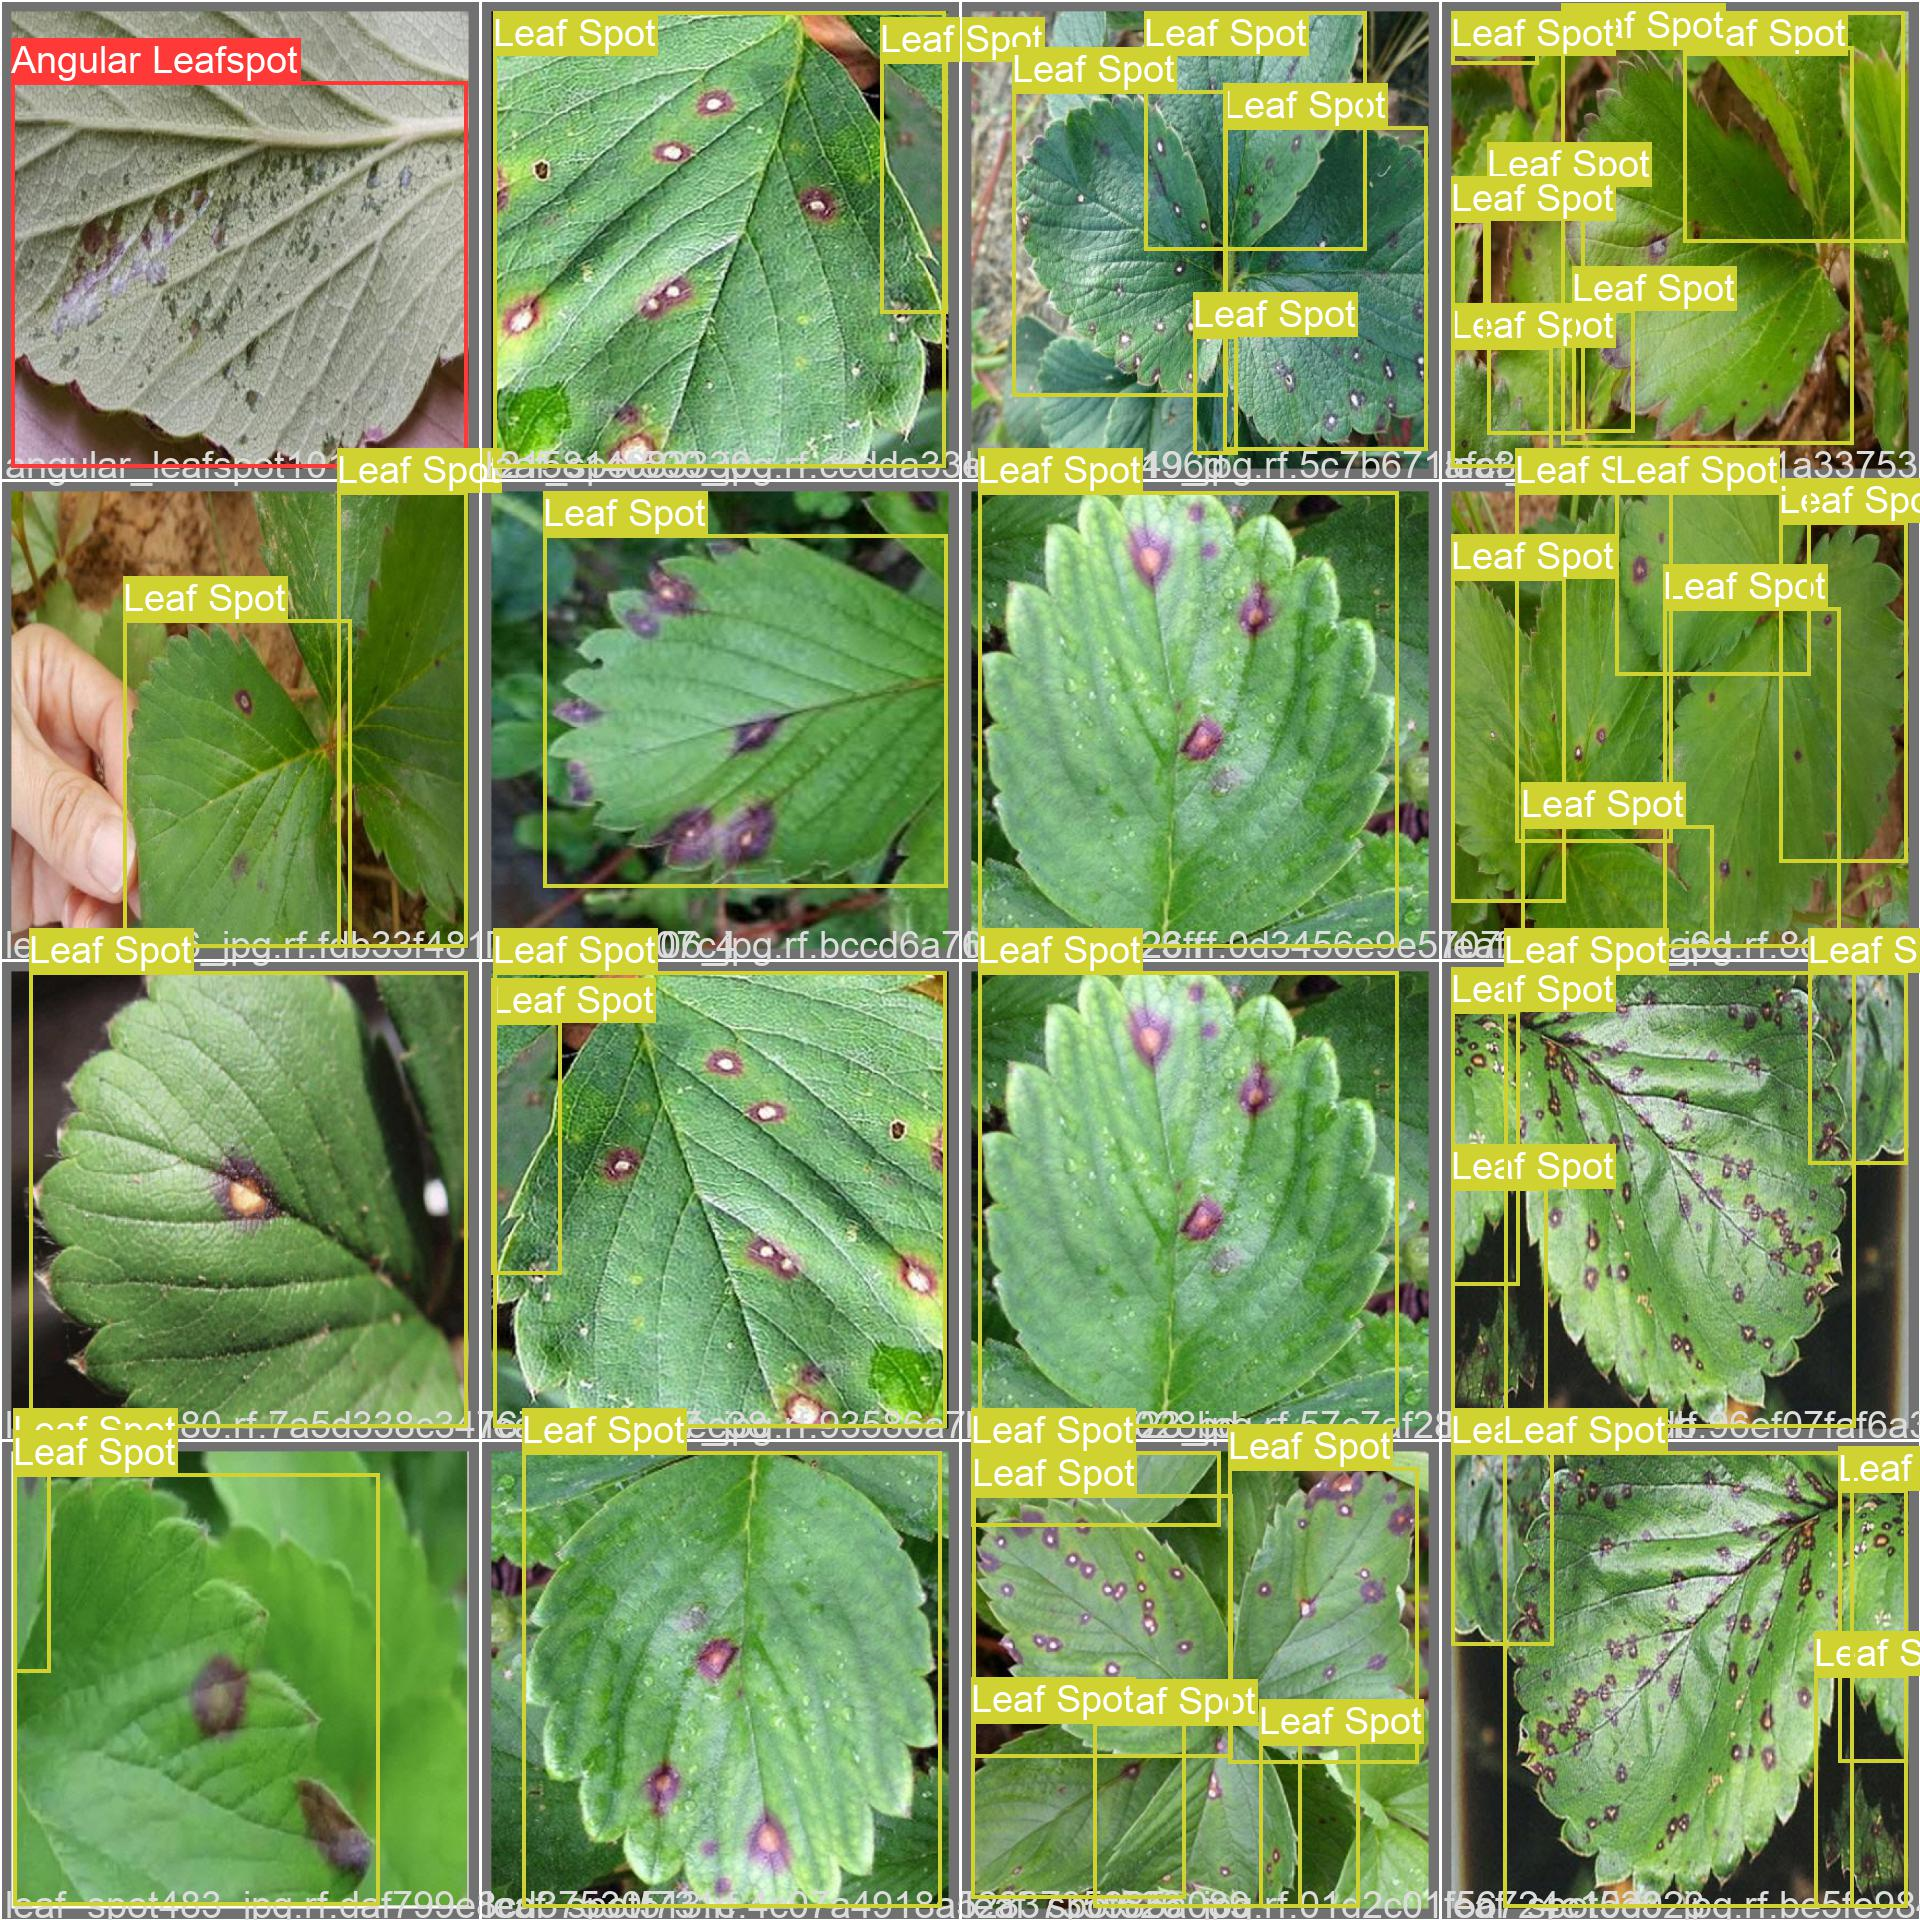

In [ ]:
Image(filename='/content/yolov5/runs/train/pothole_results/val_batch0_labels.jpg', width=1000)

In [ ]:
!python val.py --weights runs/train/pothole_results/weights/best.pt --data ./Strawberry-Disease-Detection-Dataset-2/data.yaml --img 640 --task test

val: data=./Strawberry-Disease-Detection-Dataset-2/data.yaml, weights=['runs/train/pothole_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-196-g614ef11 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7029004 parameters, 0 gradients, 15.9 GFLOPs
test: Scanning '/content/yolov5/Strawberry-Disease-Detection-Dataset-2/test/labels' images and labels...484 found, 0 missing, 0 empty, 0 corrupt: 100% 484/484 [00:00<00:00, 1272.19it/s]
test: New cache created: /content/yolov5/Strawberry-Disease-Detection-Dataset-2/test/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 16/16 [00:07<00:00,  2.01it/s]
 

In [ ]:
!python detect.py --weights runs/train/pothole_results/weights/best.pt --img 640 --conf 0.4 --source ./Strawberry-Disease-Detection-Dataset-2/test/images

detect: weights=['runs/train/pothole_results/weights/best.pt'], source=./Strawberry-Disease-Detection-Dataset-2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-196-g614ef11 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
custom_YOLOv5s summary: 213 layers, 7029004 parameters, 0 gradients, 15.9 GFLOPs
image 1/484 /content/yolov5/Strawberry-Disease-Detection-Dataset-2/test/images/angular_leafspot10.rf.7c175b78ec7624c59e49dd565b3c806a.jpg: 640x640 4 Angular Leafspots, Done. (0.010s)
image 2/484 /content/yolov5/Strawberry-Disease-Detection-Dataset-2/test/images/angular_leafspot106.rf.291057892a

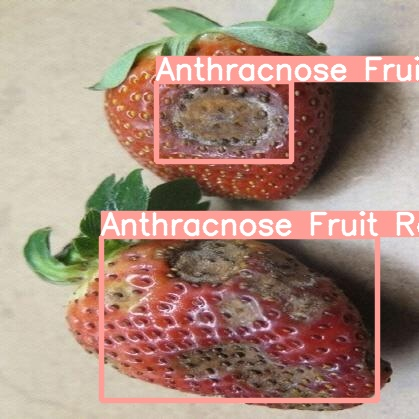

In [ ]:
import glob
import random

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name)) 

In [ ]:
# 모델 내보내기

%mkdir /content/drive/MyDrive/CAKD5/SW/m10_딥러닝응용/Strawberry-Disease-Detection-Dataset-2
%cp /content/yolov5/runs/train/pothole_results/weights/best.pt /content/drive/MyDrive/CAKD5/SW/m10_딥러닝응용/Strawberry-Disease-Detection-Dataset-2

mkdir: cannot create directory ‘/content/drive/MyDrive/CAKD5/SW/m10_딥러닝응용/Strawberry-Disease-Detection-Dataset-2’: No such file or directory
cp: cannot create regular file '/content/drive/MyDrive/CAKD5/SW/m10_딥러닝응용/Strawberry-Disease-Detection-Dataset-2': No such file or directory
